<a href="https://colab.research.google.com/github/yosep98/2024S-Ajou-ML/blob/main/HW2_202022349_%EB%B0%95%EC%9A%94%EC%85%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제1. Linear SVM vs Kernel SVM

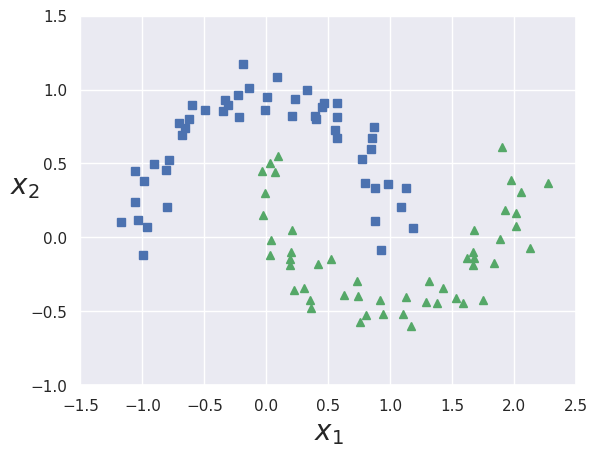

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

#Toy example 생성
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [ ]:
# decision boundary 시각화
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

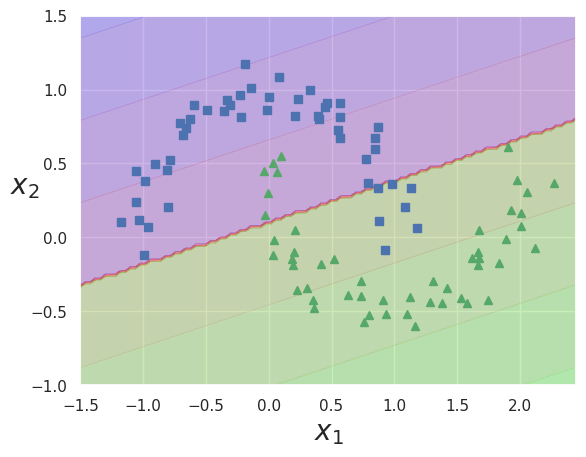

In [ ]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(C=1)
linear_svc.fit(X,y)
plot_predictions(linear_svc, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])

## 문제 1-1 Kernel SVM 학습

Kernel SVM을 아래의 조건에 맞게 학습하고 시각화를 진행하시오.

\

---
*조건*

 1. `rbf` Kernel을 사용하여 주어진 X를 `100% 정확도`로 예측하는 하이퍼파라미터를 찾으시오.
 2. `Linear SVM`과 `Kernel SVM`의 decision boundary를 시각화하시오.
 3. subplot을 활용하여 기존 `Linear SVM`와 비교할 수 있도록 시각화하시오.
 ---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요! (해당 문제의 param_gird는 예외입니다.)
* 주의) 소스코드를 입력하고 출력 결과와 함께 캡처 후**(한 이미지에)** 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ......C=6977.299649665538, gamma=103.28281259410275; total time=   0.0s
[CV] END ......C=6977.299649665538, gamma=103.28281259410275; total time=   0.0s
[CV] END ......C=6977.299649665538, gamma=103.28281259410275; total time=   0.0s
[CV] END .....C=111196.77311206979, gamma=0.6693469712958667; total time=   0.0s
[CV] END .....C=111196.77311206979, gamma=0.6693469712958667; total time=   0.0s
[CV] END .....C=111196.77311206979, gamma=0.6693469712958667; total time=   0.0s
[CV] END ......C=21117.83044448242, gamma=24.478091570444402; total time=   0.0s
[CV] END ......C=21117.83044448242, gamma=24.478091570444402; total time=   0.0s
[CV] END ......C=21117.83044448242, gamma=24.478091570444402; total time=   0.0s
[CV] END ..C=950.5082962189512, gamma=4.6273320118786936e-05; total time=   0.0s
[CV] END ..C=950.5082962189512, gamma=4.6273320118786936e-05; total time=   0.0s
[CV] END ..C=950.5082962189512, gamma=4.627332

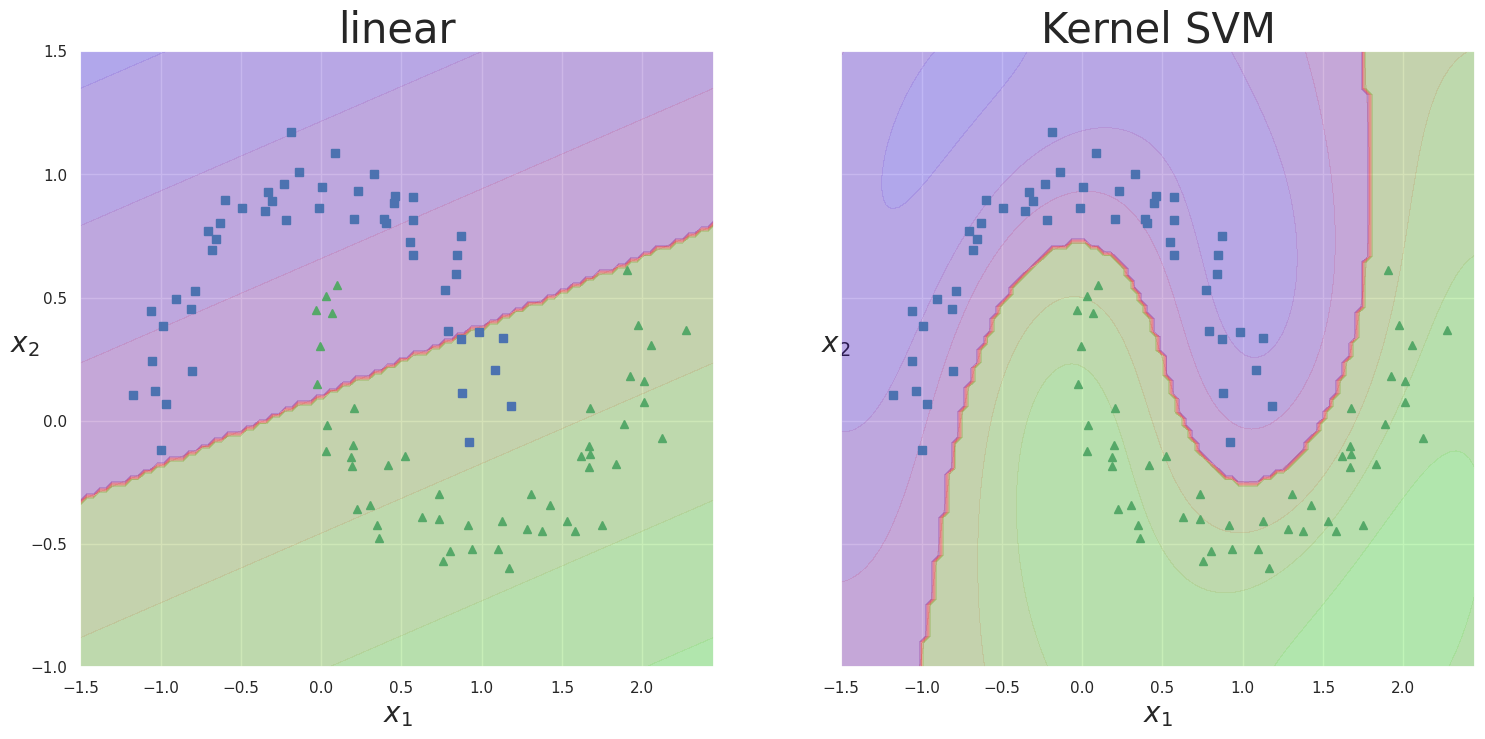

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8), sharex=True, sharey=True)

plt.sca(axes[0])
plot_predictions(linear_svc, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
plt.title("linear", fontsize=30)

#####################문제1-1###############################
# 커널 SVM 서브플롯 컨텍스트 전환
plt.sca(axes[1])

# RBF 커널 SVM을 위한 하이퍼파라미터 범위를 지정
param_distributions = {
    'C': np.logspace(-2, 10, 500),   # C 값에 대해 10^-2부터 10^10까지 500개의 값
    'gamma': np.logspace(-9, 3, 500) # gamma 값에 대해 10^-9부터 10^3까지 500개의 값
}

# RBF 커널을 사용하여 모델 객체 생성
svc_rbf = SVC(kernel='rbf')

# 최고의 하이퍼파라미터를 찾기 위한 RandomizedSearchCV
random_search = RandomizedSearchCV(svc_rbf, param_distributions, n_iter=100, cv=3, verbose=2, random_state=42, scoring='accuracy')
# 학습 데이터셋에 대해 랜덤 서치를 수행
random_search.fit(X, y)

# 찾은 최고의 추정값 사용
best_svc_rbf = random_search.best_estimator_

# 발견된 최고의 커널 SVM으로부터 예측 플롯팅
plot_predictions(best_svc_rbf, [-1.5, 2.45, -1, 1.5])  # 결정 경계 플롯
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5]) # 데이터셋 플롯
plt.title("Kernel SVM", fontsize=30) # 서브플롯의 제목을 설정

##########################
plt.show()


# 문제 1-2 Kernel SVM의 장점

* **해당 데이터에서 Linear SVM보다 Kernel SVM이 잘 동작할 수 있는 이유를 서술하시오.**
* **데이터의 분포와 모델의 특징을 연결지어서 설명하시오.**

**정답** :

## 데이터 코드

# 문제 2. Validation

- `Test set` **<font color=red> 은 문제 2-3에서만 사용해야 합니다. </font>**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# dir을 바꿔주세요.
# digits_clean 데이터를 사용해야 합니다.
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('./drive/MyDrive/24-1/digits_clean.csv').to_numpy()
labels = pd.read_csv('./drive/MyDrive/24-1/digits_target.csv').to_numpy().reshape(-1)
train_X, test_X, train_y, test_y = train_test_split(data, labels, test_size= 0.2, random_state = 12)

Mounted at /content/drive


## 문제 2-1

 - 아래 코드의 방식으로 평가 시 발생하는 문제를 서술하시오.
 - `Model fitting` 관점에서 서술
 - Validation set의 목적

In [ ]:
from sklearn.svm import SVC

rbf_kernel_svm_clf = SVC(kernel="rbf", gamma=100, C=100)
rbf_kernel_svm_clf.fit(train_X, train_y)
X_val, y_val = train_X, train_y
print(f"Validation score : {rbf_kernel_svm_clf.score(X_val, y_val)}")

Validation score : 1.0


#### 정답 :

##문제 2-2 K-fold Cross validation

5-fold Cross Validation (CV) 을 사용하여 모델을 평가하시오.

\

---
*조건*
1. **<font color=red>* cross_val_score 함수를 사용하지 마세요. </font>**
2. Cross validation score의 분산과 평균을 출력하시오.
3. Cross validation score(Accuracy)가 0.8 이상인 Hyperparameter를 찾고 전체 train set으로 학습하시오.
4. `Test set`에 대해서 `문제 2-1`에서 학습한 모델과 최종 성능에 대해서 비교하시오 (출력만 하시면 됩니다).

---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요! (해당 문제의 param_gird는 예외입니다.)
* 주의) 소스코드를 입력하고 출력 결과와 함께 캡처 후**(한 이미지에)** 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.


In [ ]:
from sklearn.model_selection import KFold
#####################문제2-2###############################
# 5-fold Cross Validation을 위한 KFold 객체 생성
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# 초기 하이퍼파라미터 값으로 시작합니다.
best_score = 0
best_params = {'gamma': 1, 'C': 10}
# 하이퍼파라미터 조정 범위 설정
gamma_range = np.logspace(-9, 3, 13)
C_range = np.logspace(-2, 10, 13)
# 교차 검증 및 하이퍼파라미터 조정
for gamma in gamma_range:
    for C in C_range:
        # 각 조합에 대한 점수를 저장할 리스트
        cv_scores = []
        # KFold 교차 검증 수행
        for train_index, val_index in kfold.split(train_X):
            # 훈련 데이터와 검증 데이터 분할
            X_ktrain, X_val = train_X[train_index], train_X[val_index]
            y_ktrain, y_val = train_y[train_index], train_y[val_index]

            # RBF 커널을 사용하는 SVC 모델 생성 및 학습
            kernel_svm_clf = SVC(kernel='rbf', gamma=gamma, C=C)
            kernel_svm_clf.fit(X_ktrain, y_ktrain)

            # 검증 데이터에서 점수 계산
            val_score = kernel_svm_clf.score(X_val, y_val)
            cv_scores.append(val_score)

        # 현재 조합에 대한 평균 점수와 분산 계산
        mean_score = np.mean(cv_scores)
        variance_score = np.var(cv_scores)

        # 최고 평균 점수를 갱신하는 경우, 최적 하이퍼파라미터 저장
        if mean_score > best_score and mean_score >= 0.8:
            best_score = mean_score
            best_params = {'gamma': gamma, 'C': C}
#평균 출력
print(f"평균 : {best_score:.4f}")
#분산 출력
print(f"분산 : {variance_score:.4f}")
# 최적의 하이퍼파라미터로 최종 모델 생성 및 전체 훈련 데이터에 대한 학습 수행
final_svm = SVC(kernel='rbf', gamma=best_params['gamma'], C=best_params['C'])
final_svm.fit(train_X, train_y)
#########################################################
print(f"final_model 정확도 : {final_svm.score(test_X,test_y)}")
print(f"2-1 model 정확도 : {rbf_kernel_svm_clf.score(test_X,test_y)}")

평균 : 0.9904
분산 : 0.0000
final_model 정확도 : 0.9895833333333334
2-1 model 정확도 : 0.1076388888888889


# 문제 2-3 Stratified K-fold Cross validation

위에서 찾은 하이퍼파라미터로 Stratified K-fold Cross validation을 진행하면서 각 fold의 test y(class)의 분포를 histplot(혹은 barplot) 시각화하세요.

\

---
*조건*

1. **<font color=red>* cross_val_score 함수를 사용하지 마세요. </font>**
2. fold 별 y 분포 그래프의 경우, 주어진 subplot을 활용하세요.
3. (Stratified) Cross validation score의 분산과 평균을 출력하시오.

---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요! (해당 문제의 param_gird는 예외입니다.)
* 주의) 소스코드를 입력하고 출력 결과와 함께 캡처 후**(한 이미지에)** 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

In [ ]:
from sklearn.model_selection import StratifiedKFold
import seaborn as sns

평균 : 0.9870
분산 : 0.0000


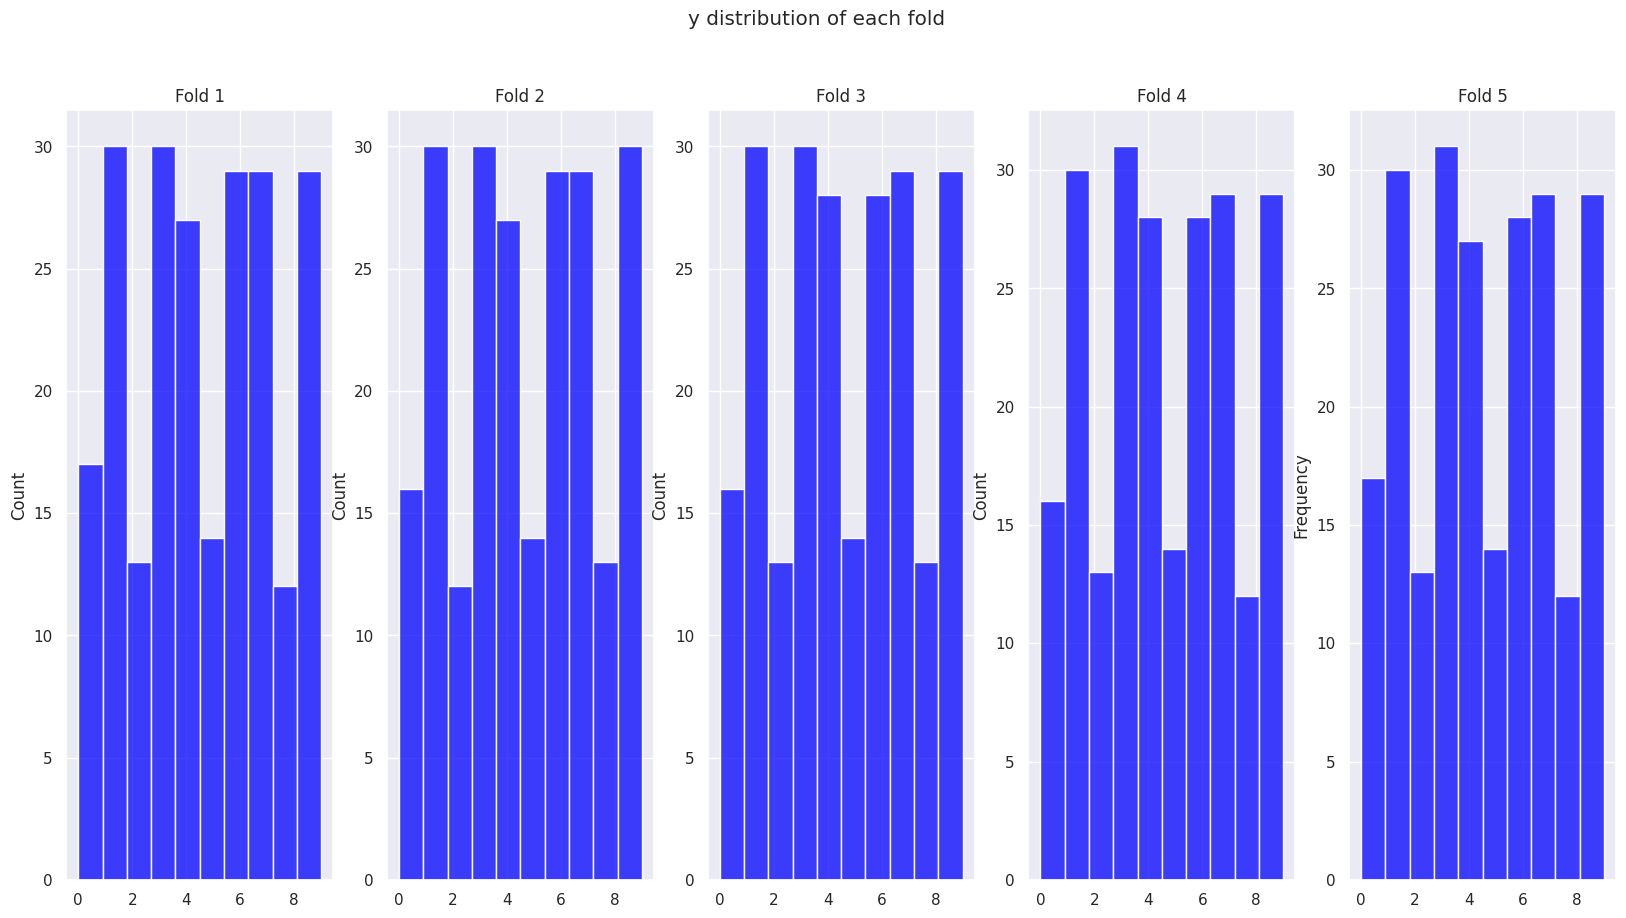

In [ ]:


#####################문제2-3###############################
# 설정된 하이퍼파라미터
gamma = best_params['gamma']
C = best_params['C']

# Stratified K-Fold 설정
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

fig, axes = plt.subplots(1, 5, figsize=(20, 10))
fold = 0
for train_index, test_index in skf.split(train_X, train_y):
    # Train and test split
    X_train_fold, X_test_fold = train_X[train_index], train_X[test_index]
    y_train_fold, y_test_fold = train_y[train_index], train_y[test_index]

    # 모델 설정 및 훈련
    model = SVC(kernel='rbf', gamma=gamma, C=C)
    model.fit(X_train_fold, y_train_fold)
    # 점수 계산 및 저장
    score = model.score(X_test_fold, y_test_fold)
    scores.append(score)
    # 각 fold의 y 분포 시각화
    sns.histplot(y_test_fold, bins=np.unique(y_train_fold).size, ax=axes[fold], color='blue', stat="count")
    axes[fold].set_title(f"Fold {fold + 1}")
    fold += 1
# 그래프 제목 설정
fig.suptitle("y distribution of each fold")
plt.ylabel("Frequency")
# 평균 및 분산 출력
mean_score = np.mean(scores)
variance_score = np.var(scores)
print(f"평균 : {mean_score:.4f}")
print(f"분산 : {variance_score:.4f}")
plt.show()
########################################################

# 문제 3. Grid search

- Scikit-learn 라이브러리를 이용하여 RandomForestClassifier의 최적의 파라미터를 찾는다.

- 아래 baseline 모델보다 높은 성능을 보이는 RandomForestClassifier 모델을 구축한다.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# dir 바꾸시기 바랍니다.
df = pd.read_csv('/content/drive/MyDrive/Bank_clean.csv')


# 코드 건드리지 말 것
for i in df.columns: # label encoding
    if type(df[i].unique()[0]) == str :
      le = LabelEncoder()
      df[i] = le.fit_transform(df[i])

y = df['y']
X = df.drop(columns = 'y')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 코드 건드리지 말 것
clf = RandomForestClassifier(n_estimators = 10) # Baseline Model
score=cross_val_score(clf, X_train, y_train, cv=5)
print(f"baseline cross validation score : {score.mean()}")

baseline = clf.fit(X_train,y_train)

baseline cross validation score : 0.8446740858505566



### 문제 3-1
주어진 링크를 참고하여 변경가능한 hyperparameter를 `param_grid`에 추가하세요.

그리고 추가한 hyperparameter에 대해 RandomForestClassifier에 GridSearch cross validation(cv=5)을 수행하는 코드를 작성하고, Accuracy 기반 가장 높은 성능을 보이는 best hyperparameter를 확인하세요.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

---
*조건*

- **<font color=red>* Baseline보다 validation score(ACC)가 높아야 합니다. (낮을 시 감점)</font>**
- **충분히 grid search를 진행하세요.**


---



* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요! (해당 문제의 param_gird는 예외입니다.)
* 주의) 소스코드를 입력하고 출력 결과와 함께 캡처 후**(한 이미지에)** 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [ ]:
##param_grid##를 추가하세요
param_grid = {
    'n_estimators': [100,200,300],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9],
    'criterion' :['gini', 'entropy']
}

In [ ]:
clf = RandomForestClassifier(random_state=42) # 과제를 위해 random_state를 고정해두었습니다.

########################## 문제 3-1 ##########################
########################## 코드 작성 ##########################

## 문제 8-1 ##
## 코드 작성 #
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
#여러 파라미터들을 그리드서치하는 모델을 생성
grid_search.fit(X_train, y_train)
#trainset을 학습
#가장 좋은 파라미터를 찾기
############
best_parameters =grid_search.best_params_
best_score = grid_search.best_score_
############################################################

print(f"Best parameters: {best_parameters}")
print(f"Best score: {best_score}")

Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 300}
Best score: 0.8572337042925279


### 문제 3-2
3-1에서 구한 best parameter를 사용하여 최종적인 RandomForestClassifier를 만든 다음 train 데이터로 학습 후, `accuracy_score`를 사용하여 test accuracy를 출력하세요.



\

---
*조건*

* **<font color=red>test accuracy가 0.87 미만일 경우 감점</font>**
* **충분히 grid search를 진행하세요.**
---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 소스코드를 입력하고 출력 결과와 함께**(한 이미지에)** 캡처 후 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.



In [ ]:
from sklearn.metrics import accuracy_score

## 문제 3-2 ##
## 코드 작성 ##

clf = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                              max_features=grid_search.best_params_['max_features'],
                              max_depth=grid_search.best_params_['max_depth'],
                              criterion=grid_search.best_params_['criterion'],
                              random_state=42)
# best_params_에 저장된 파라미터로 RandomForestClassifier를 생성

clf.fit(X_train, y_train)
#  RandomForestClassifier를 학습


y_pred = clf.predict(X_test)
#학습된모델로 test를 실행합니다.

accuracy = accuracy_score(y_test, y_pred)
#accuracy_score로 정확도 계산하기

best_model =clf
############
y_pred1 = baseline.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred1)

y_pred2 = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred2)

print(f'Base Model 정확도: {baseline_accuracy:.4f}')
print(f'Best Model 정확도: {best_accuracy:.4f}')

Base Model 정확도: 0.8601
Best Model 정확도: 0.8735


#문제 4. evaluation
### 문제 4-1
문제 3에서 얻은, baseline이 구한 예측값 `y_pred1`과 grid_search로 구한 Best model의 `y_pred2`를 바탕으로, 각 모델의 성능을 평가해봅시다.

confusion matrix를 그리고, F1, Precision, Recall의 평가 지표를 출력하는 코드를 작성하세요.


---


*조건*
1. 주어진 코드를 기반으로 시각화를 진행하세요.
2. Plot 안에 score들이 출력돼야 합니다. (print 함수 X)
3. axes[i].text를 건드리지 마세요.



---




* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

* 힌트) heatmap

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

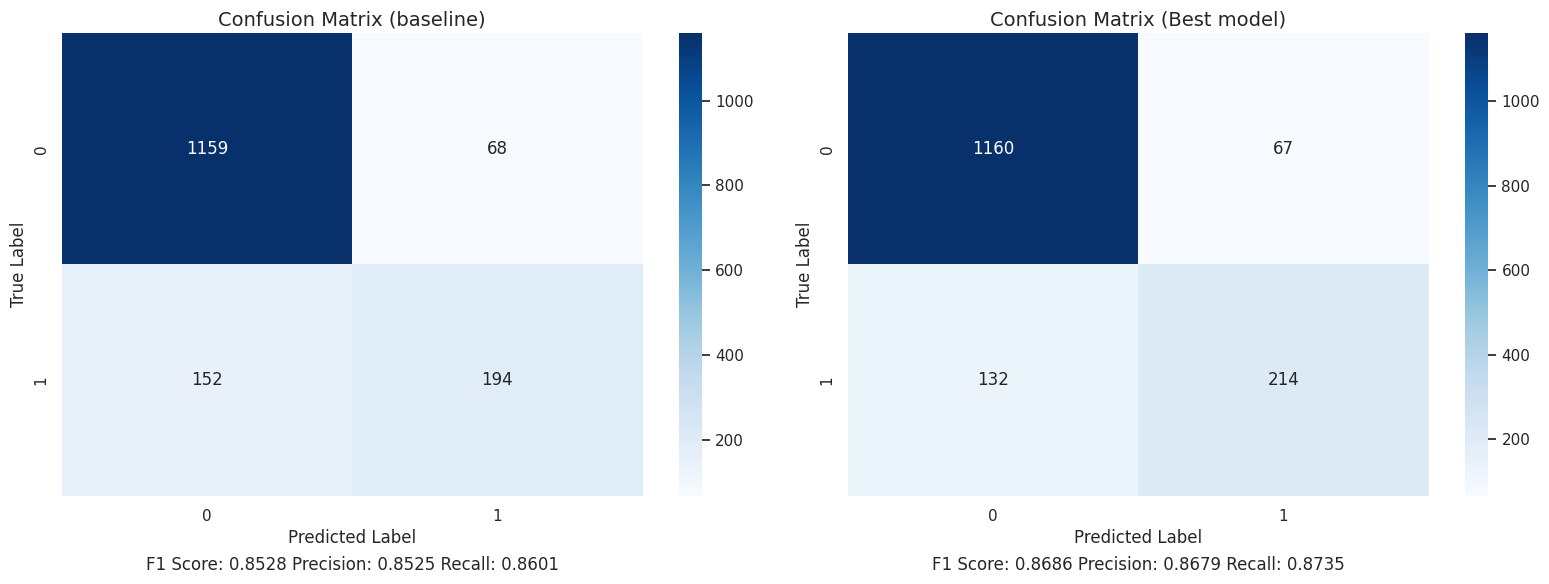

In [ ]:
########################## 문제 4-1 ##########################
########################## 코드 작성 ##########################
# 혼동 행렬(confusion matrix)을 계산
cm1 = confusion_matrix(y_test, y_pred1)
# F1 점수를 계산
f1_1 = f1_score(y_test, y_pred1, average='weighted')
# precision 점수를 계산
precision_1 = precision_score(y_test, y_pred1, average='weighted')
# recall 점수를 계산
recall_1 = recall_score(y_test, y_pred1, average='weighted')
# 혼동 행렬(confusion matrix)을 계산
cm2 = confusion_matrix(y_test, y_pred2)
# F1 점수를 계산
f1_2 = f1_score(y_test, y_pred2, average='weighted')
# precision 점수를 계산
precision_2 = precision_score(y_test, y_pred2, average='weighted')
# recall 점수를 계산
recall_2 = recall_score(y_test, y_pred2, average='weighted')
# 그래프 그리기
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# 첫 번째 subplot: baseline model
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=axes[0])  # 혼동 행렬 시각화
axes[0].set_title('Confusion Matrix (baseline)', fontsize=14)
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].text(0.5, -0.15, f'F1 Score: {f1_1:.4f} Precision: {precision_1:.4f} Recall: {recall_1:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes,
             fontsize=12)
# 두 번째 subplot: best model
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", ax=axes[1])  # 혼동 행렬 시각화
axes[1].set_title('Confusion Matrix (Best model)', fontsize=14)
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].text(0.5,-0.15, f'F1 Score: {f1_2:.4f} Precision: {precision_2:.4f} Recall: {recall_2:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes,
             fontsize=12)
# subplot  간격 조절
plt.tight_layout()
#출력
plt.show()
####################################


### 문제 4-2
baseline과 bset_model에 대한 ROC Curve와 AUROC를 구하고, 두 모델의 ROC Curve를 시각화하시오.

\

---

*조건*
1. 두 모델의 ROC Curve (line)를 비교할 수 있도록 **하나의 그래프**에 시각화해야 합니다.
2. plot의 legend 안에 각 모델의 AUROC score를 출력하시오. (예시, Best model (area = 0.833))



---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.
* 힌트) model**.predict_proba**를 사용


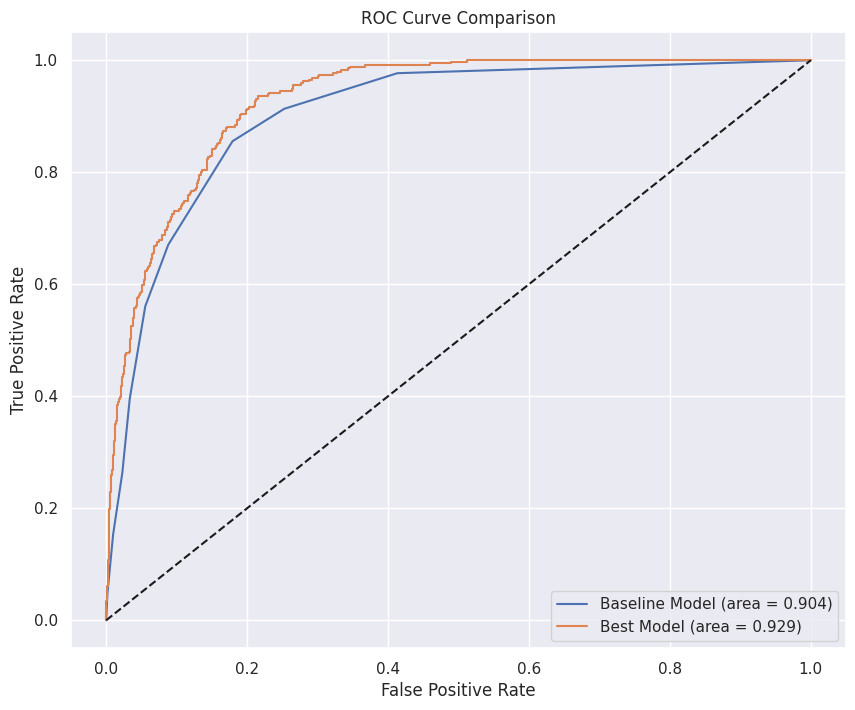

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

########################## 문제 4-2 ##########################
########################## 코드 작성 ##########################

# 두개의 모델 양성 클래스(일반적으로 레이블 '1')의 확률을 사용
y_probs_baseline = baseline.predict_proba(X_test)[:, 1]
y_probs_best = best_model.predict_proba(X_test)[:, 1]

# ROC Curve 생성 및 AUROC 점수 계산
# (FPR) (TPR)을 계산
fpr_base, tpr_base, _ = roc_curve(y_test, y_probs_baseline)
# 이러한 값들을 기반으로 AUROC 점수 계산
roc_auc_base = roc_auc_score(y_test, y_probs_baseline)
# best model의 예측 확률 계산
# 위와 동일한 방식으로 best model에 대해 계산
fpr_best, tpr_best, _ = roc_curve(y_test, y_probs_best)
roc_auc_best = roc_auc_score(y_test, y_probs_best)

# ROC 곡선을 그립니다
plt.figure(figsize=(10, 8))
plt.plot(fpr_base, tpr_base, label=f'Baseline Model (area = {roc_auc_base:.3f})')  # 기본 모델의 ROC
plt.plot(fpr_best, tpr_best, label=f'Best Model (area = {roc_auc_best:.3f})')  # 최고 모델의 ROC
plt.plot([0, 1], [0, 1], 'k--')  # 대각 점선
# 축 라벨을 설정
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# 그래프 제목을 설정
plt.title('ROC Curve Comparison')
# 범례를 오른쪽 아래에 위치
plt.legend(loc="lower right")
#출력
plt.show()